In [1]:
import numpy as np
import pandas as pd
import datetime as dt

from scipy import stats 

# To show all columns in a dataframe
pd.options.display.max_info_columns=250
pd.options.display.max_columns=500

# To make pretty plots
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-ticks')
sns.set_style('ticks')
plt.rcParams['figure.figsize'] = (4, 6)
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

%matplotlib inline

# Explore MIMIC

In [2]:
df1 = pd.read_csv("../data/mimic-ft98.csv")
print(df1.shape)
df1.head()

(12652, 105)


,stay_id,starttime,endtime,admission_location,insurance,language,ethnicity,marital_status,gender,age,hours_in_hosp_before_intubation,weight,height,co2_total_max,co2_total_avg,co2_total_min,ph_max,ph_avg,ph_min,lactate_max,lactate_avg,lactate_min,pao2fio2ratio,heart_rate_max,heart_rate_avg,heart_rate_min,mbp_max,mbp_avg,mbp_min,mbp_ni_max,mbp_ni_avg,mbp_ni_min,resp_rate_max,resp_rate_avg,resp_rate_min,temp_max,temp_avg,temp_min,spo2_max,spo2_avg,spo2_min,glucose_max,glucose_avg,glucose_min,vasopressin,epinephrine,dobutamine,norepinephrine,phenylephrine,dopamine,count_of_vaso,fio2_max,fio2_avg,fio2_min,peep_max,peep_avg,peep_min,plateau_pressure_max,plateau_pressure_avg,plateau_pressure_min,rrt,sinus_rhythm,neuroblocker,congestive_heart_failure,cerebrovascular_disease,dementia,chronic_pulmonary_disease,rheumatic_disease,mild_liver_disease,diabetes_without_cc,diabetes_with_cc,paraplegia,renal_disease,malignant_cancer,severe_liver_disease,metastatic_solid_tumor,aids,SOFA,respiration,coagulation,liver,cardiovascular,cns,renal,apsiii,hr_score,mbp_score,temp_score,resp_rate_score,pao2_aado2_score,hematocrit_score,wbc_score,creatinine_score,uo_score,bun_score,sodium_score,albumin_score,bilirubin_score,glucose_score,acidbase_score,gcs_score,duration,log_duration,over72h,alive96h
0,30000670,2182-04-14 07:45:00,2182-04-15 10:00:00,EMERGENCY ROOM,Medicare,ENGLISH,BLACK/AFRICAN AMERICAN,DIVORCED,M,69,81,51.7,173.0,38.0,37.000000,36.0,7.39,7.390000,7.39,2.2,2.200000,2.2,305.0,83.0,67.520000,56.0,95.0,79.880000,68.0,95.0,79.88,68.0,20.5,15.442308,13.0,36.61,35.787500,35.00,100.0,99.923077,98.0,179.0,165.500000,149.0,0,0,0,0,0,0,0,50.0,41.111111,40.0,6.4,4.640000,0.0,18.0,14.200000,11.0,0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,4,2.0,0.0,NaN,0.0,1,1.0,47,1.0,7.0,2.0,8.0,0.0,3.0,0.0,0.0,7.0,7.0,0.0,NaN,NaN,0.0,12.0,0.0,26.250000,3.267666,0,1
1,30000974,2119-06-21 19:30:00,2119-07-07 13:10:00,EMERGENCY ROOM,Medicare,ENGLISH,WHITE,SINGLE,F,92,0,55.0,157.0,25.0,25.000000,25.0,7.44,7.440000,7.44,2.4,2.400000,2.4,252.0,91.0,82.500000,69.0,78.0,66.478261,52.0,53.0,52.50,52.0,34.0,29.108696,20.0,38.22,37.406667,37.00,100.0,98.318182,97.0,159.0,130.500000,102.0,0,0,0,1,0,0,1,50.0,50.000000,50.0,5.0,5.000000,5.0,17.0,15.500000,14.0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0.0,0.0,0.0,3.0,3,0.0,76,0.0,15.0,0.0,6.0,0.0,3.0,5.0,0.0,5.0,11.0,0.0,6.0,0.0,0.0,12.0,13.0,377.666667,5.934012,1,1
2,30001939,2151-04-06 16:55:00,2151-04-15 15:40:00,EMERGENCY ROOM,Medicaid,ENGLISH,WHITE,SINGLE,M,47,460,42.0,175.0,20.0,19.142857,18.0,7.28,7.224286,7.18,1.3,1.250000,1.2,92.5,108.0,87.821429,62.0,98.0,76.431034,58.0,98.0,78.15,57.0,34.0,21.550000,14.0,36.67,36.325000,35.89,100.0,96.964286,92.0,158.0,112.400000,91.0,0,0,0,1,0,0,1,100.0,88.333333,80.0,7.0,4.454545,0.0,31.0,31.000000,31.0,0,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,13,4.0,1.0,0.0,4.0,4,0.0,132,1.0,15.0,2.0,9.0,14.0,3.0,5.0,3.0,5.0,2.0,2.0,11.0,0.0,0.0,12.0,48.0,214.750000,5.369475,1,1
3,30002055,2171-09-26 14:28:00,2171-09-29 08:55:00,WALK-IN/SELF REFERRAL,Medicare,ENGLISH,BLACK/AFRICAN AMERICAN,MARRIED,M,69,2,58.8,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.0,116.500000,90.0,150.0,83.250000,44.0,65.0,53.25,44.0,26.0,19.580000,10.0,35.00,33.950000,33.20,100.0,99.190476,84.0,271.0,229.111111,167.0,0,1,0,1,0,0,2,30.0,30.000000,30.0,19.0,11.933333,8.0,30.0,23.833333,18.0,0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,5,NaN,NaN,NaN,4.0,1,0.0,62,7.0,10.0,20.0,0.0,15.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,2.0,0.0,66.450000,4.196450,0,1
4,30003299,2169-08-22 01:51:00,2169-08-28 12:02:00,EMERGENCY ROOM,Other,ENGLISH,WHITE,SINGLE,M,26,1,120.0,178.0,29.0,24.888889,21.0,7.40,7.335556,7.27,4.0,2.777778,1.5,280.0,133.0,119.500000,101.0,122.0,93.071429,70.0,NaN,NaN,NaN,18.0,17.105263,12.0,37.44,36.971667,36.39,100.0,98.555556,96.0,185.0,152.166667,130.0,0,0,0,0,0,0,0,50.0,48.333333,40.0,5.0,5.000000,5.0,25.0,23.600000,22.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0.0,0.0,NaN,0.0,3,0.0,48,7.0,7.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,NaN,NaN,0.0,

In [3]:
columns = [
    'height', 
    'resp_rate_avg', 
    'temp_avg', 
    'peep_avg', 
    'peep_min',
    'plateau_pressure_max', 
    'plateau_pressure_avg', 
#     'paraplegia',
    'cns',
    'apsiii',
    'acidbase_score',
    'gcs_score',
    'hours_in_hosp_before_intubation'
           ]

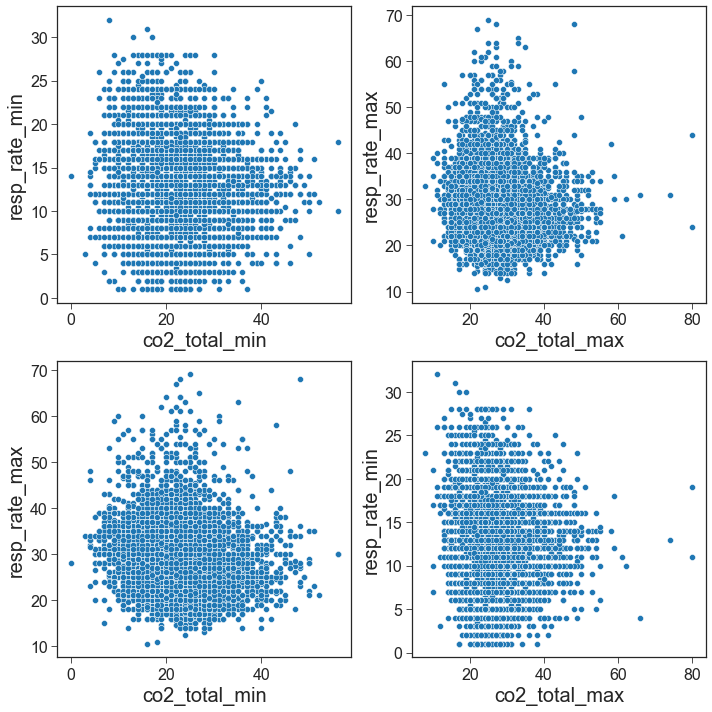

In [4]:
plt.rcParams['figure.figsize'] = (10, 10)

_, ax = plt.subplots(2, 2)

sns.scatterplot(x="co2_total_min", y="resp_rate_min", data=df1, ax=ax[0,0]);
sns.scatterplot(x="co2_total_max", y="resp_rate_max", data=df1, ax=ax[0,1]);
sns.scatterplot(x="co2_total_min", y="resp_rate_max", data=df1, ax=ax[1,0]);
sns.scatterplot(x="co2_total_max", y="resp_rate_min", data=df1, ax=ax[1,1]);

plt.tight_layout();

# plt.savefig("../results/RR vs CO2", bbox_inches='tight', dpi=300, transparent=False, pad_inches=0);

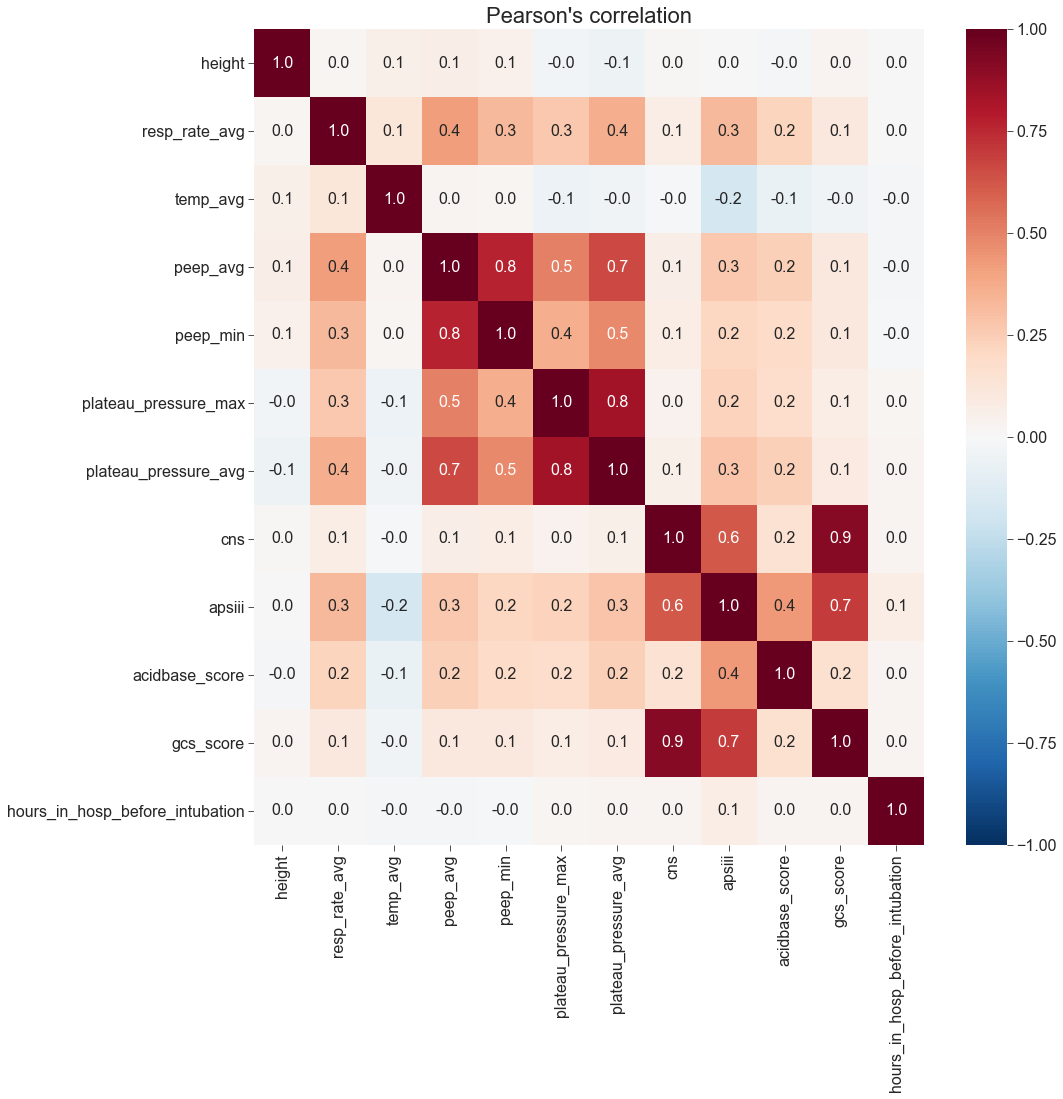

In [5]:
plt.rcParams['figure.figsize'] = (15, 15)
sns.heatmap(df1[columns].corr(method="pearson"), 
            vmin=-1, vmax=1, 
            cmap="RdBu_r", 
            annot=True, fmt=".1f", 
            annot_kws={"fontsize": 16});
plt.title("Pearson's correlation");

plt.savefig("../results/Heatmap 12 features", bbox_inches='tight', dpi=300, transparent=False, pad_inches=0);

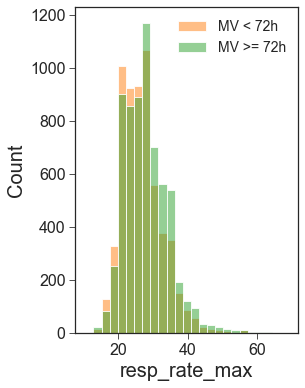

In [6]:
plt.rcParams['figure.figsize'] = (4, 6)
palette = (sns.color_palette()[2], sns.color_palette()[1])
sns.histplot(x="resp_rate_max", data=df1, bins=25, 
             hue="over72h", hue_order=[1,0], palette=palette,
             legend=True);
plt.legend(loc="upper right", labels=["MV < 72h", "MV >= 72h"], fontsize=14);

plt.savefig('../results/mimic_resp_rate_avg.jpeg', bbox_inches='tight', dpi=300)

In [7]:
x1 = df1.loc[(df1.over72h==0), "resp_rate_avg"]
x2 = df1.loc[(df1.over72h==1), "resp_rate_avg"]
stats.mannwhitneyu(x1.dropna(), x2.dropna(), alternative="two-sided")

MannwhitneyuResult(statistic=15856221.0, pvalue=1.267074225862406e-86)

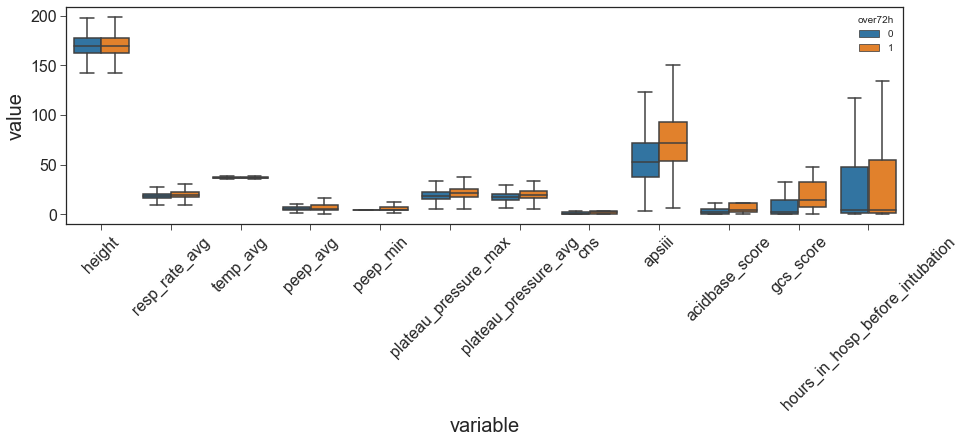

In [8]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.boxplot(x="variable", y="value", hue="over72h", 
            data=pd.melt(df1, id_vars=['over72h'], value_vars=columns), 
            showfliers=False);

plt.xticks(rotation=45);

# Compare MIMIC to eICU

In [9]:
df2 = pd.read_csv("../data/eicu-ft58.csv")
print(df2.shape)
df2.head()

(21185, 64)


,stay_id,starttime,endtime,duration,over72h,ph_max,spo2_min,heart_rate_min,heart_rate_max,resp_rate_min,resp_rate_max,temp_min,temp_max,glucose_max,glucose_min,co2_total_max,co2_total_min,mbp_max,mbp_ni_min,apsiii,peep_max,peep_min,co2_total_avg,fio2_min,plateau_pressure_max,height,peep_avg,temp_avg,hr_score,mbp_score,temp_score,resp_rate_score,pao2_aado2_score,hematocrit_score,wbc_score,creatinine_score,uo_score,bun_score,sodium_score,albumin_score,bilirubin_score,glucose_score,acidbase_score,gcs_score,SOFA,respiration,coagulation,liver,cardiovascular,cns,renal,hospitalid,numbedscategory,region,teachingstatus,lactate_max,lactate_min,lactate_avg,resp_rate_avg,plateau_pressure_avg,plateau_pressure_min,age,hours_in_hosp_before_intubation,log_duration
0,2127890,1853,4506,44.217,0,NaN,89.0,107.0,196.0,16.0,49.0,35.9,37.4,187.0,80.0,NaN,NaN,93.0,52.0,96.0,8.0,5.0,NaN,70.0,21.0,162.60,6.364,36.569,17.0,15.0,0.0,11.0,15.0,3.0,19.0,7.0,15.0,11.0,2.0,0.0,6.0,5.0,12.0,0.0,12,3,4,2,1,0,2,307,L,South,False,9.1,4.5,6.875,24.600,20.200,19.0,55,38,3.789109
1,2519150,95,4175,68.000,0,NaN,88.0,96.0,116.0,13.0,28.0,37.4,38.4,194.0,106.0,NaN,NaN,90.0,60.0,39.0,10.0,5.0,NaN,NaN,29.0,165.10,7.167,37.843,5.0,7.0,0.0,6.0,0.0,3.0,0.0,4.0,15.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,7,3,1,0,1,1,1,338,XL,Midwest,False,1.3,1.3,1.300,18.600,20.500,12.0,29,4,4.219508
2,919705,3012,5367,39.250,0,7.51,85.0,58.0,73.0,15.0,20.0,35.8,36.4,288.0,219.0,NaN,NaN,129.0,61.0,35.0,15.0,5.0,NaN,NaN,38.0,166.00,6.800,36.040,0.0,6.0,8.0,6.0,15.0,3.0,0.0,0.0,15.0,7.0,0.0,11.0,0.0,5.0,12.0,0.0,4,1,0,0,1,1,1,146,L,West,False,NaN,NaN,NaN,16.359,26.857,16.0,61,51,3.669951
3,1554681,44,1724,28.000,0,7.40,91.0,87.0,113.0,0.0,23.0,36.8,37.4,NaN,NaN,NaN,NaN,88.0,56.0,71.0,NaN,NaN,NaN,30.0,18.0,167.60,NaN,37.117,5.0,15.0,0.0,0.0,0.0,3.0,5.0,0.0,15.0,0.0,0.0,11.0,6.0,0.0,0.0,0.0,6,3,0,2,1,0,0,248,M,Midwest,False,NaN,NaN,NaN,16.136,18.000,18.0,66,36,3.332205
4,260998,89,1937,30.800,0,7.25,75.0,109.0,121.0,28.0,35.0,36.3,37.3,278.0,92.0,NaN,NaN,82.5,43.0,140.0,8.0,8.0,NaN,75.0,NaN,172.72,8.000,36.825,7.0,15.0,0.0,18.0,0.0,3.0,19.0,7.0,15.0,7.0,2.0,11.0,5.0,5.0,4.0,24.0,16,1,3,2,4,2,4,79,XL,Midwest,False,7.1,5.5,6.133,31.333,NaN,NaN,64,1,3.427515


In [10]:
df1["source"] = "MIMIC-IV"
df2["source"] = "eICU"
df = pd.concat([df1, df2])
df.shape

(33837, 110)

In [11]:
df = df[columns + ['source', 'over72h']]
df.shape

(33837, 14)

**A single variable**

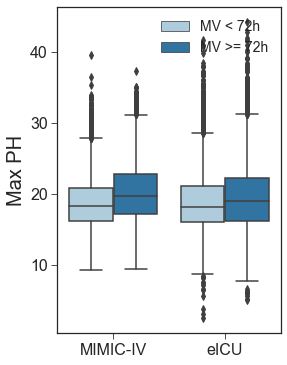

In [12]:
plt.rcParams['figure.figsize'] = (4, 6)

ax = sns.boxplot(x="source", y="resp_rate_avg", hue="over72h", data=df, palette="Paired");
plt.ylabel("Max PH");
plt.xlabel("");
# plt.ylim([6.75, 8.3]);

handles, _ = ax.get_legend_handles_labels()
plt.legend(loc="upper right", handles=handles, labels=["MV < 72h", "MV >= 72h"], fontsize=14);

# Uncomment to save the figure in high resolution
# plt.savefig('../results/Max PH.jpeg', bbox_inches='tight', dpi=300)

**All 15 features in a facet grid**

In [13]:
ylabels = ["Height", 
           "Avg RR",
           "Avg temperature",
           "Avg PEEP",
           "Min PEEP",
           "Max plateau pressure",
           "Avg plateau pressure",
           "CNS",
           "APS III",
           "Acid/base",
           "GCS",
           "Hours in hospital before intubation",
          ]

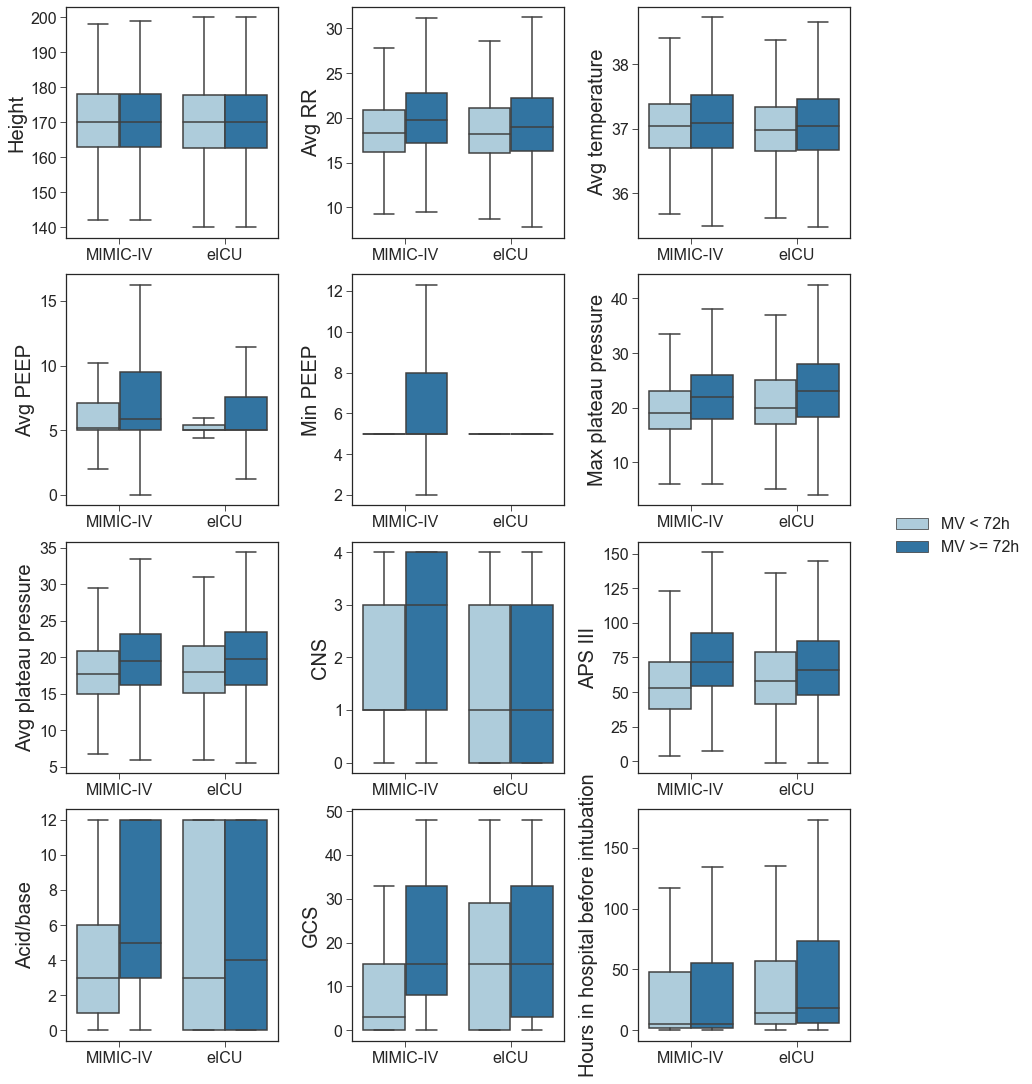

In [14]:
fig, axes = plt.subplots(4, 3, sharex=False, figsize=(12,15))

for i in range(len(columns)):
    ax = axes.flat[i]
    sns.boxplot(x="source", y=columns[i], hue="over72h", data=df, 
                palette="Paired", ax=ax, showfliers=False);
    ax.set(xlabel="", ylabel=ylabels[i])
    ax.legend([]);
    
plt.tight_layout()
    
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles=handles, labels=["MV < 72h", "MV >= 72h"], fontsize=16,
           loc='center right', bbox_to_anchor=(1.2, 0.5));

# Uncomment to save the figure in high resolution
# plt.savefig('../results/All 12ft.jpeg', bbox_inches='tight', dpi=300)

In [15]:
p_values = []
for group in df.over72h.unique():
    print(group)
    for col in columns:
        x1 = df.loc[(df.source=="MIMIC-IV")&(df.over72h==group), col]
        x2 = df.loc[(df.source=="eICU")&(df.over72h==group), col]
        _, p = stats.mannwhitneyu(x1.dropna(), x2.dropna(), alternative="two-sided")
        p_values.append(p)
        print("Mann Whitney on %s: p-value = %.3f" % (col, p))
    print()

0
Mann Whitney on height: p-value = 0.000
Mann Whitney on resp_rate_avg: p-value = 0.334
Mann Whitney on temp_avg: p-value = 0.000
Mann Whitney on peep_avg: p-value = 0.000
Mann Whitney on peep_min: p-value = 0.000
Mann Whitney on plateau_pressure_max: p-value = 0.000
Mann Whitney on plateau_pressure_avg: p-value = 0.000
Mann Whitney on cns: p-value = 0.000
Mann Whitney on apsiii: p-value = 0.000
Mann Whitney on acidbase_score: p-value = 0.003
Mann Whitney on gcs_score: p-value = 0.000
Mann Whitney on hours_in_hosp_before_intubation: p-value = 0.000

1
Mann Whitney on height: p-value = 0.038
Mann Whitney on resp_rate_avg: p-value = 0.000
Mann Whitney on temp_avg: p-value = 0.000
Mann Whitney on peep_avg: p-value = 0.000
Mann Whitney on peep_min: p-value = 0.000
Mann Whitney on plateau_pressure_max: p-value = 0.000
Mann Whitney on plateau_pressure_avg: p-value = 0.067
Mann Whitney on cns: p-value = 0.000
Mann Whitney on apsiii: p-value = 0.000
Mann Whitney on acidbase_score: p-value = 0

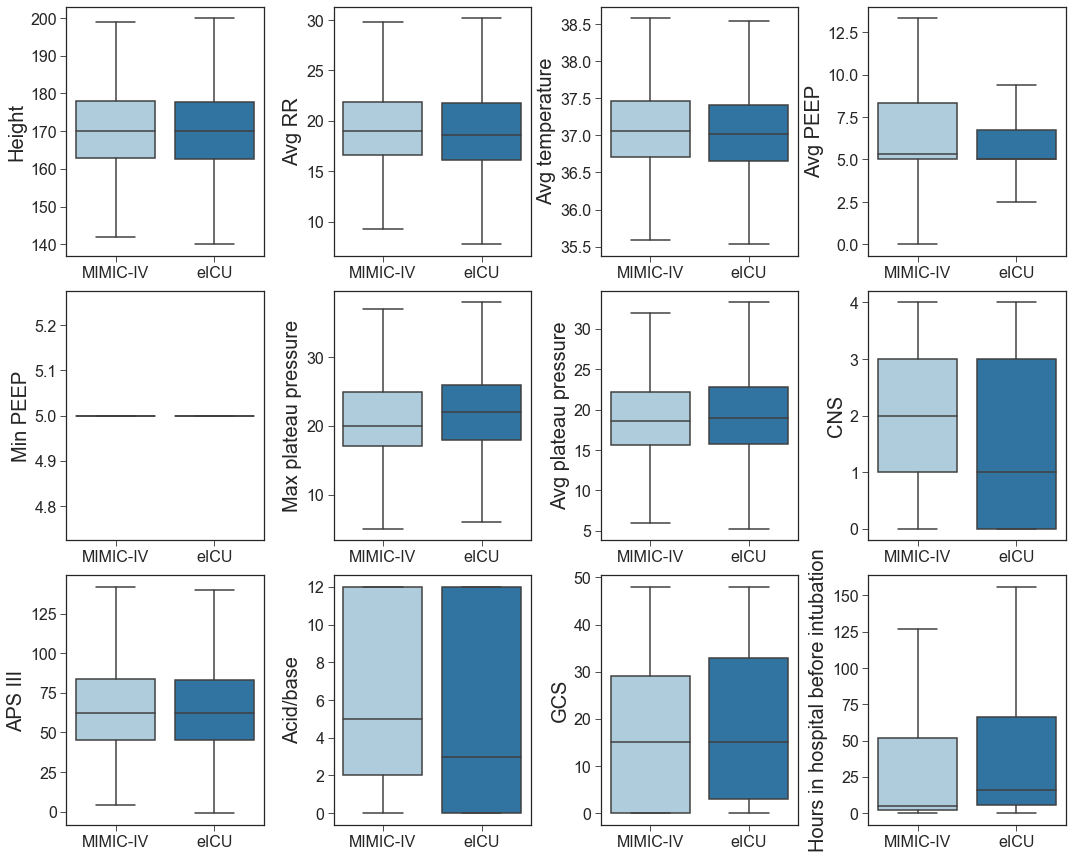

In [16]:
fig, axes = plt.subplots(3, 4, sharex=False, figsize=(15,12))

for i in range(len(columns)):
    ax = axes.flat[i]
    sns.boxplot(x="source", y=columns[i], data=df, 
                palette="Paired", ax=ax, showfliers=False);
    ax.set(xlabel="", ylabel=ylabels[i])
    ax.legend([]);
    
plt.tight_layout();

# Uncomment to save the figure in high resolution
# plt.savefig('../results/15ft boxplots.jpeg', bbox_inches='tight', dpi=300)

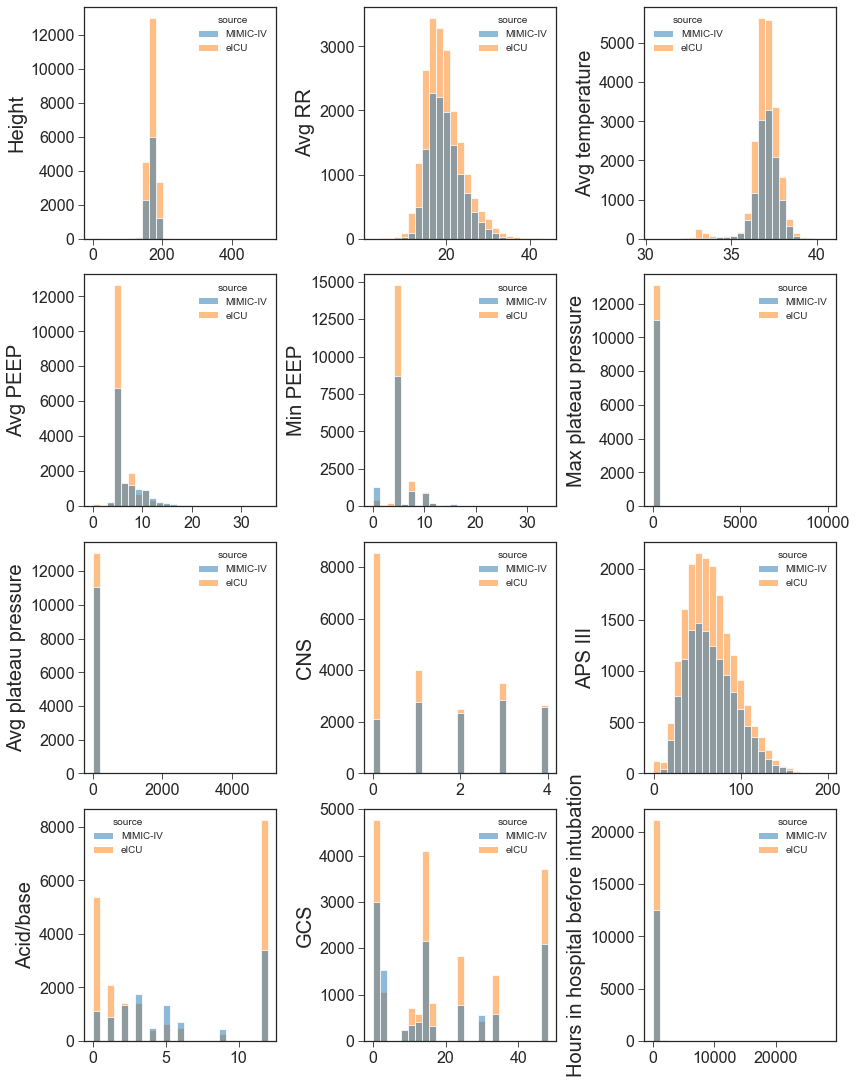

In [17]:
fig, axes = plt.subplots(4, 3, sharex=False, figsize=(12,15))

for i in range(len(columns)):
    ax = axes.flat[i]
    sns.histplot(x=columns[i], hue="source", 
                 data=df, bins=25,
                 color=sns.color_palette(), 
                 ax=ax, legend=True);
    ax.set(xlabel="", ylabel=ylabels[i])

plt.tight_layout();

# Uncomment to save the figure in high resolution
# plt.savefig('../results/15ft histplots.jpeg', bbox_inches='tight', dpi=300)

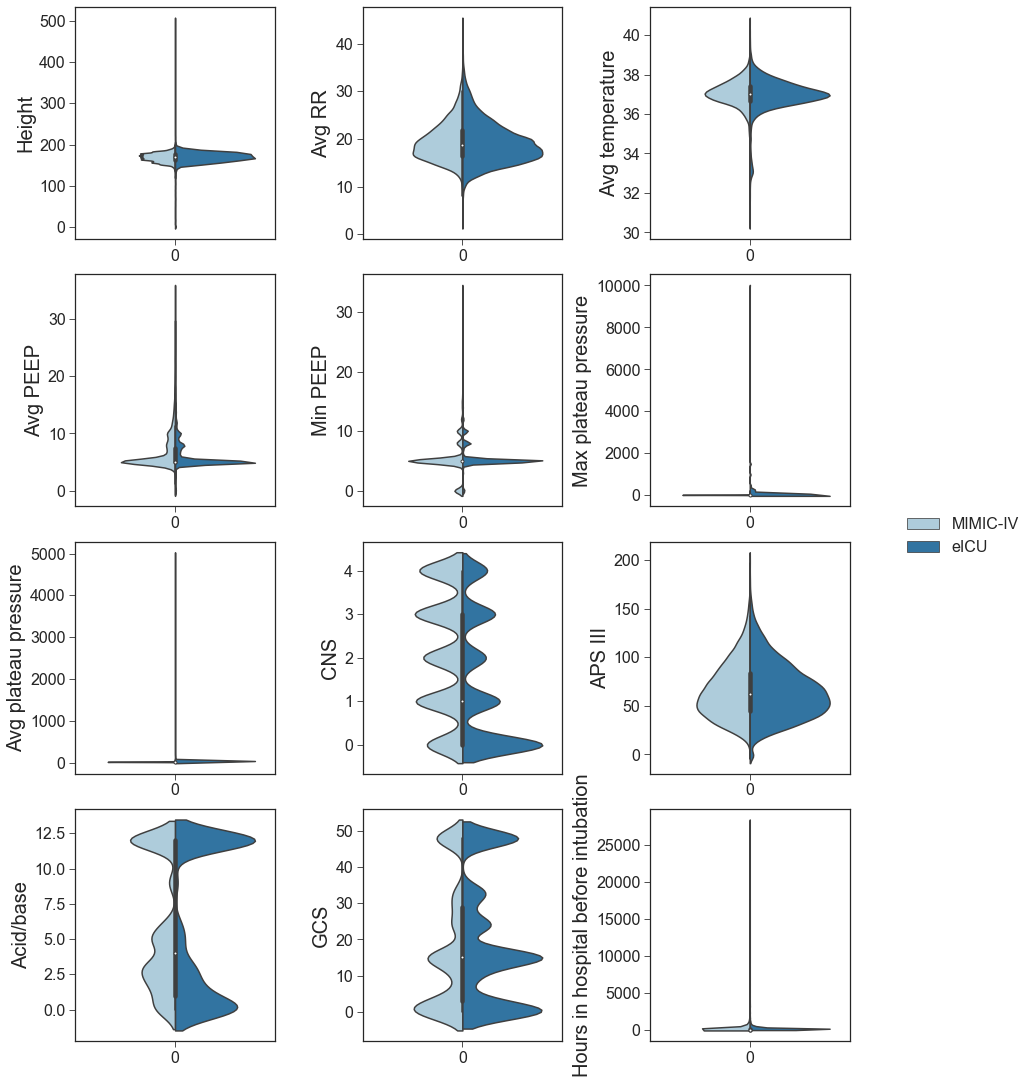

In [18]:
fig, axes = plt.subplots(4, 3, sharex=False, figsize=(12,15))

df["x"] = 0

for i in range(len(columns)):
    ax = axes.flat[i]
    sns.violinplot(x="x", y=columns[i], hue="source", data=df, 
                   split=True, scale="count",
                   palette="Paired", ax=ax);
    ax.set(xlabel="", ylabel=ylabels[i]);
    ax.legend([]);

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles=handles, labels=["MIMIC-IV", "eICU"], fontsize=16,
           loc='center right', bbox_to_anchor=(1.2, 0.5));

plt.tight_layout();

# Uncomment to save the figure in high resolution
# plt.savefig('../results/15ft violinplots.jpeg', bbox_inches='tight', dpi=300)

In [19]:
p_values = []
for col in columns:
    x1 = df.loc[df.source=="MIMIC-IV", col]
    x2 = df.loc[df.source=="eICU", col]
    _, p = stats.mannwhitneyu(x1.dropna(), x2.dropna(), alternative="two-sided")
    p_values.append(p)
    print("Mann Whitney on %s: p-value = %.3f" % (col, p))
print()

Mann Whitney on height: p-value = 0.000
Mann Whitney on resp_rate_avg: p-value = 0.000
Mann Whitney on temp_avg: p-value = 0.000
Mann Whitney on peep_avg: p-value = 0.000
Mann Whitney on peep_min: p-value = 0.003
Mann Whitney on plateau_pressure_max: p-value = 0.000
Mann Whitney on plateau_pressure_avg: p-value = 0.000
Mann Whitney on cns: p-value = 0.000
Mann Whitney on apsiii: p-value = 0.264
Mann Whitney on acidbase_score: p-value = 0.000
Mann Whitney on gcs_score: p-value = 0.000
Mann Whitney on hours_in_hosp_before_intubation: p-value = 0.000

